<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/R_lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
import rpy2
from rpy2.robjects.packages import importr

import logging

# Игнорировать предупреждения уровня WARNING и выше
logging.getLogger('rpy2.rinterface_lib.callbacks').setLevel(logging.ERROR)


robjects.r('install.packages("feasts")')

<rpy2.rinterface_lib.sexp.NULLType object at 0x7afaec4db4c0> [RTYPES.NILSXP]

In [ ]:
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Создание временного ряда
time_series = pd.Series([8, 6, 5, 3, 5, 6, 7, 8, 8,22,24,23,22,21,23,5,4,5,6,5],index=pd.date_range(start='01-01-2022',periods=20, freq='D'))
print(time_series)

# Преобразование временного ряда в numpy array
time_series_np = np.array(time_series)


# Загрузка библиотеки feasts
feasts = importr('feasts')

# Преобразование numpy array в объект R
time_series_r = robjects.FloatVector(time_series_np)
param = robjects.FloatVector([2])

# Вызов функции var_tiled_mean на временном ряду
result = feasts.shift_kl_max(time_series_r,param)
print(result)

point_as = time_series.iloc[int(result[1]):int(result[1])+1]
print(point_as)

2022-01-01     8
2022-01-02     6
2022-01-03     5
2022-01-04     3
2022-01-05     5
2022-01-06     6
2022-01-07     7
2022-01-08     8
2022-01-09     8
2022-01-10    22
2022-01-11    24
2022-01-12    23
2022-01-13    22
2022-01-14    21
2022-01-15    23
2022-01-16     5
2022-01-17     4
2022-01-18     5
2022-01-19     6
2022-01-20     5
Freq: D, dtype: int64
  shift_kl_max shift_kl_index 
      5.045057       9.000000 

2022-01-10    22
Freq: D, dtype: int64


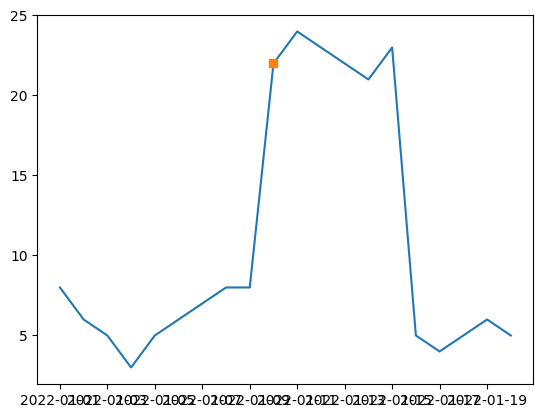

In [ ]:
import matplotlib.pyplot as plt
plt.plot(time_series, label='test')
plt.plot(point_as,marker='s')
plt.show()

In [ ]:
import rpy2.robjects as robjects

# Создание временного ряда типа ts в R с помощью rpy2
robjects.r('time_series_ts <- ts(c(1, 2, 3, 5555, 5, 6, 7, 8, 9), start = 10, frequency = 1)')

1.000000,2.000000,3.000000,...,7.000000,8.000000,9.000000


In [ ]:

# Получение индексов временного ряда в R с помощью rpy2
indexs = robjects.r('time_series_ts')
print(indexs)

Time Series:
Start = 10 
End = 18 
Frequency = 1 
[1]    1    2    3 5555    5    6    7    8    9



In [ ]:
result2 = feasts.shift_kl_max(indexs,param)
result2

3712.037309,4.000000


In [ ]:
point_as

2022-01-10    22
Freq: D, dtype: int64

In [ ]:
time_series.iloc[9:10]

2022-01-10    22
Freq: D, dtype: int64

In [ ]:
result[1]+1

10.0

In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Импортируйте R пакет 'feasts'
feasts = importr('feasts')

# Создание временного ряда в R
time_series_r = robjects.FloatVector([1, 2, 10, 4, 11,12]) # Пример данных
# param = 2  # Пример параметра
param = robjects.FloatVector([2])

# Использование двойного подчеркивания для передачи именованного аргумента в R функцию
result = feasts.shift_level_max(**{'x': time_series_r, '.size': param})

print(result)

  shift_level_max shift_level_index 
              5.5               3.0 



In [ ]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# Импортируйте R пакет 'feasts'
feasts = importr('feasts')

# Создание временного ряда в R
time_series_r = robjects.FloatVector([1, 2, 10, 4, 11,12]) # Пример данных
# param = 2  # Пример параметра
size = robjects.FloatVector([2])
period = robjects.FloatVector([3])

# Использование двойного подчеркивания для передачи именованного аргумента в R функцию
result = feasts.shift_kl_max(**{'x': time_series_r, '.size': size,'.period':period})

print(result)

  shift_kl_max shift_kl_index 
     0.8985223      4.0000000 



Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Sat May  4 08:27:48 2024 

summary(.)  :
----------
Created Using changepoint version 2.2.4 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 13.81551 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 51 

51.0


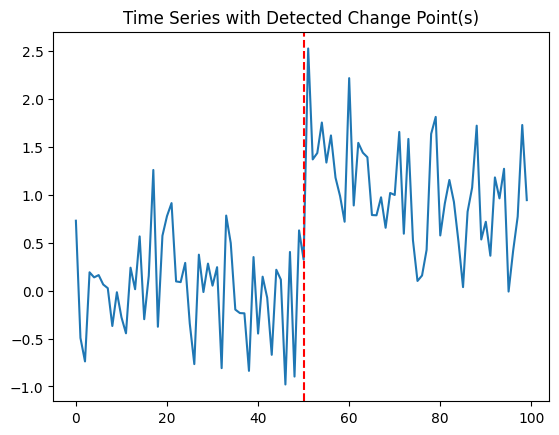

In [21]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt

# # Установка пакета changepoint, если он не установлен
# robjects.r('install.packages("changepoint", repos="http://cran.us.r-project.org", quiet=TRUE)')

# Импорт пакета changepoint
changepoint = importr('changepoint')

# Генерация примера данных в R
dta = robjects.r('cp_data <- c(rnorm(50, mean = 0, sd = 0.5), rnorm(50, mean = 1, sd = 0.5))')

# Использование сгенерированных данных
time_series_np = dta

# Применение функции cpt.mean из пакета changepoint
r_cpt = changepoint.cpt_mean(time_series_np, **{"method":"AMOC","class":"TRUE"})

# Вывод результатов обнаружения точек изменения
print(r_cpt)

# Получение точек изменения
change_points = robjects.r('cpts')(r_cpt)

# Построение графика с обнаруженными точками изменения
plt.plot(time_series_np)
for cp in change_points:
    print(cp)
    plt.axvline(x=cp - 1, color='red', linestyle='--')  # R индексирует с 1, Python - с 0
plt.title("Time Series with Detected Change Point(s)")
plt.show()

In [30]:
type(int(list(change_points)[0]))

int

In [31]:
type(int(change_points[0]))

int

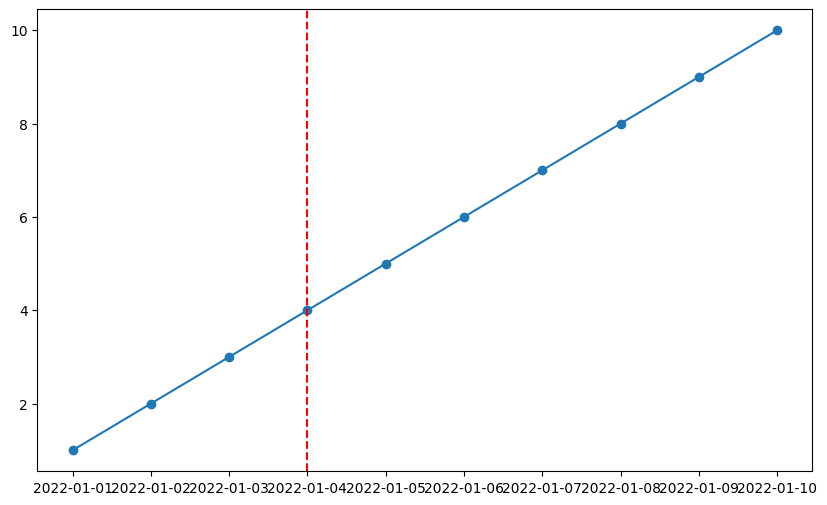

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Создание pd.Series с индексами datetime
dates = pd.date_range(start='2022-01-01', periods=10)
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ts = pd.Series(data, index=dates)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts.values, marker='o', linestyle='-')

# Преобразование строки в объект datetime перед добавлением вертикальной пунктирной линии
line_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
plt.axvline(x=ts.iloc[3:4].index, color='r', linestyle='--')

plt.show()

In [41]:
ts.iloc[:1].index

DatetimeIndex(['2022-01-01'], dtype='datetime64[ns]', freq='D')